<img src="https://pbs.twimg.com/profile_images/2205879609/pystreet-logo.png"/ width="80" align="left" style="padding-right:10px;"> 
# Python Developer Salary Survey Results
<hr/>
The survey was conducted over a 1 month period in February 2014 using a simple Google form. The anonymized data was then stored in an SQL Server database. The raw data is publicly accessible via SlashDB API. In this notebook we are doing some simple analysis of the results using (what else) Python. Enjoy.

## Access to raw survey data provided by SlashDB
http://demo.slashdb.com/db/pystreet.html

### Survey data, HTML representation
* Results table: http://demo.slashdb.com/db/pystreet/response.html
* Results with salaries converted to USD: http://demo.slashdb.com/db/pystreet/response_usd.html
* USA only: http://demo.slashdb.com/db/pystreet/response_usd/country/United%20States.html

### Survey data, JSON representation
* Results table: http://demo.slashdb.com/db/pystreet/response.json
* Results with salaries converted to USD: http://demo.slashdb.com/db/pystreet/response_usd.json
* USA only: http://demo.slashdb.com/db/pystreet/response_usd/country/United%20States.json

### Data Load

In [1]:
%matplotlib inline
import pandas
import numpy

pandas.options.display.float_format = '${:,.2f}'.format

responses_all = pandas.read_json('http://demo.slashdb.com/db/pystreet/response_usd.json')
responses_usa = pandas.read_json('http://demo.slashdb.com/db/pystreet/response_usd/country/United%20States.json')

In [12]:
responses_usa

__href  ccy        country  \
0     /db/pystreet/response_usd/response_id/2.json  USD  United States   
1     /db/pystreet/response_usd/response_id/3.json  USD  United States   
2    /db/pystreet/response_usd/response_id/31.json  USD  United States   
3    /db/pystreet/response_usd/response_id/53.json  USD  United States   
4    /db/pystreet/response_usd/response_id/54.json  USD  United States   
5    /db/pystreet/response_usd/response_id/57.json  USD  United States   
6   /db/pystreet/response_usd/response_id/168.json  USD  United States   
7   /db/pystreet/response_usd/response_id/170.json  USD  United States   
8   /db/pystreet/response_usd/response_id/173.json  USD  United States   
9   /db/pystreet/response_usd/response_id/174.json  USD  United States   
10  /db/pystreet/response_usd/response_id/176.json  USD  United States   
11  /db/pystreet/response_usd/response_id/157.json  USD  United States   
12  /db/pystreet/response_usd/response_id/158.json  USD  United States   
13  /db/pystreet/response_usd/response_id/159.json  USD  United States   
14  /db/pystreet/response_usd/response_id/162.json  USD  United States   
15  /db/pystreet/response_usd/response_id/163.json  USD  United States   
16  /db/pystreet/response_usd/response_id/164.json  USD  United States   
17  /db/pystreet/response_usd/response_id/145.json  USD  United States   
18  /db/pystreet/response_usd/response_id/147.json  USD  United States   
19  /db/pystreet/response_usd/response_id/148.json  USD  United States   
20  /db/pystreet/response_usd/response_id/149.json  USD  United States   
22  /db/pystreet/response_usd/response_id/155.json  USD  United States   
23  /db/pystreet/response_usd/response_id/129.json  USD  United States   
24  /db/pystreet/response_usd/response_id/130.json  USD  United States   
25  /db/pystreet/response_usd/response_id/133.json  USD  United States   
26  /db/pystreet/response_usd/response_id/135.json  USD  United States   
27  /db/pystreet/response_usd/response_id/142.json  USD  United States   
28  /db/pystreet/response_usd/response_id/144.json  USD  United States   
29  /db/pystreet/response_usd/response_id/112.json  USD  United States   
30  /db/pystreet/response_usd/response_id/115.json  USD  United States   
31  /db/pystreet/response_usd/response_id/116.json  USD  United States   
32  /db/pystreet/response_usd/response_id/120.json  USD  United States   
33  /db/pystreet/response_usd/response_id/122.json  USD  United States   
34  /db/pystreet/response_usd/response_id/124.json  USD  United States   
35   /db/pystreet/response_usd/response_id/90.json  USD  United States   
36   /db/pystreet/response_usd/response_id/91.json  USD  United States   
37   /db/pystreet/response_usd/response_id/96.json  USD  United States   
38  /db/pystreet/response_usd/response_id/102.json  USD  United States   
39  /db/pystreet/response_usd/response_id/103.json  USD  United States   
40  /db/pystreet/response_usd/response_id/109.json  USD  United States   
41   /db/pystreet/response_usd/response_id/59.json  USD  United States   
42   /db/pystreet/response_usd/response_id/64.json  USD  United States   
43   /db/pystreet/response_usd/response_id/65.json  USD  United States   
44   /db/pystreet/response_usd/response_id/67.json  USD  United States   
45   /db/pystreet/response_usd/response_id/72.json  USD  United States   
46   /db/pystreet/response_usd/response_id/74.json  USD  United States   

    desired_salary  desired_salary_usd      empl_type  response_id  \
0       $60,000.00          $60,000.00       Employee            2   
1      $125,000.00         $125,000.00       Employee            3   
2       $80,000.00          $80,000.00       Employee           31   
3      $125,000.00         $125,000.00  Self-employed           53   
4      $125,000.00         $125,000.00       Employee           54   
5       $75,000.00          $75,000.00       Employee           57   
6      $125,000.00         $125,000.00       Employee          168   
7    

## Survey participation by country

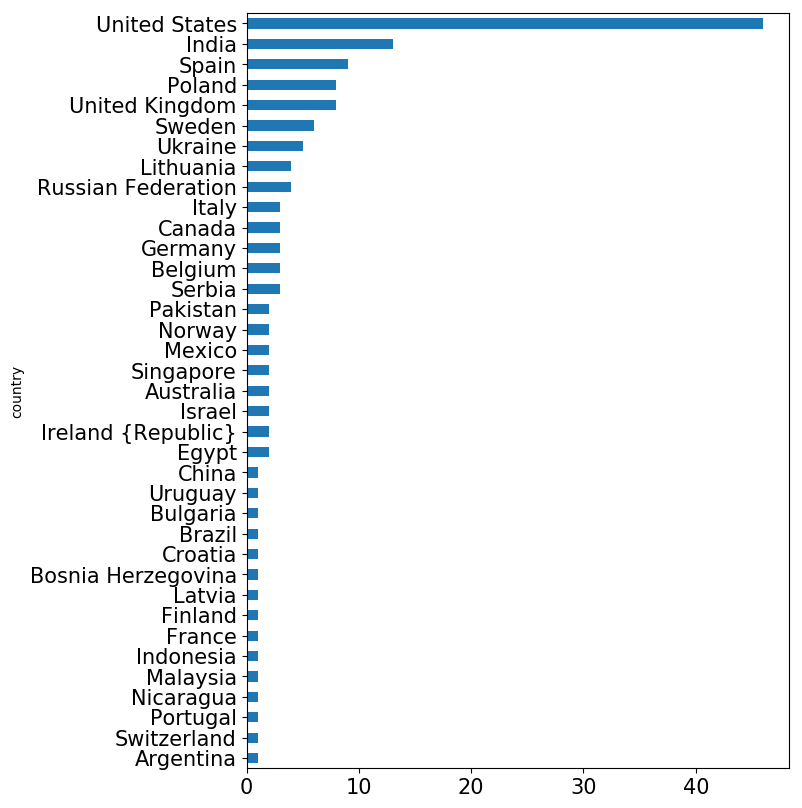

In [13]:
by_country = responses_all.groupby('country').size().sort_values()
by_country.plot(kind='barh', figsize=(7,10), fontsize=15)

## Salary Analysis
### Remove outliers
Note that there are a few outliers in the raw data, where the annual salary is clearly outside of sensible range. Skip the following cell if you don't want to remove the outliers or modify the cutoff values.

In [5]:
min_salary_cutoff = 500
max_salary_cutoff = 800000
responses_all = responses_all[responses_all['salary_usd'] > min_salary_cutoff]
responses_all = responses_all[responses_all['salary_usd'] < max_salary_cutoff]
responses_usa = responses_usa[responses_usa['salary_usd'] > min_salary_cutoff]
responses_usa = responses_usa[responses_usa['salary_usd'] < max_salary_cutoff]

### Salary paid

In [6]:
salary = responses_all["salary_usd"]
salary_usa = responses_usa["salary_usd"]
desired_salary = responses_all["desired_salary_usd"]

d = [{'Min':salary_usa.min(),'Max':salary_usa.max(),'Avg':salary_usa.mean(),'Median':salary_usa.median()},
 {'Min':salary.min(),'Max':salary.max(),'Avg':salary.mean(),'Median':salary.median()}]
df = pandas.DataFrame.from_records(d)
df = df[['Min','Max','Avg','Median']]
df.index = ['USA','Worldwide',]
df

Min         Max         Avg     Median
USA       $30,000.00 $600,000.00 $105,998.96 $95,000.00
Worldwide  $1,443.30 $600,000.00  $63,817.37 $50,000.00

### Salary desired

In [7]:
desired_salary = responses_all["desired_salary_usd"]
desired_salary_usa = responses_usa["desired_salary_usd"]

d = [{'Min':desired_salary_usa.min(),'Max':desired_salary_usa.max(),'Avg':desired_salary_usa.mean(),'Median':desired_salary_usa.median()},
 {'Min':desired_salary.min(),'Max':desired_salary.max(),'Avg':desired_salary.mean(),'Median':desired_salary.median()}]
df = pandas.DataFrame.from_records(d)
df = df[['Min','Max','Avg','Median']]
df.index = ['USA','Worldwide',]
df

Min         Max         Avg      Median
USA       $40,000.00 $700,000.00 $127,043.39 $120,000.00
Worldwide  $1,900.00 $700,000.00  $84,593.24  $69,444.44

### USA Salary Breakdown

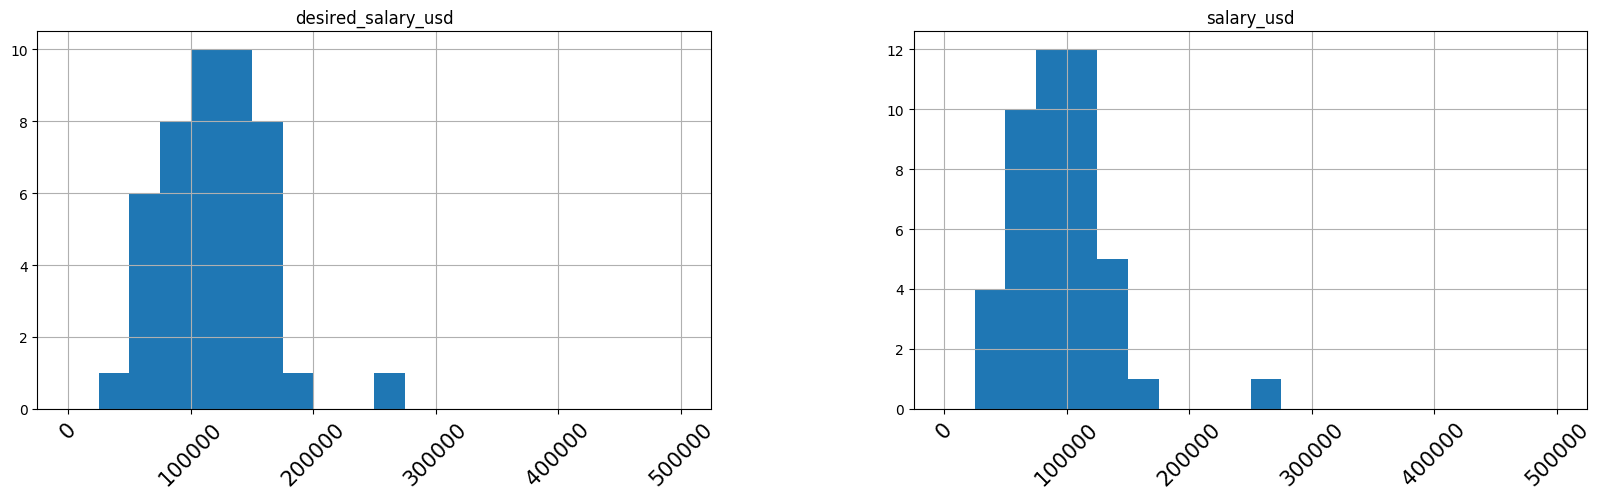

In [8]:
plot = responses_usa.hist(column=['salary_usd','desired_salary_usd'], bins=[0, 25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000], figsize=(20,5), xrot=45, xlabelsize=15)

### Worldwide Salary Breakdown

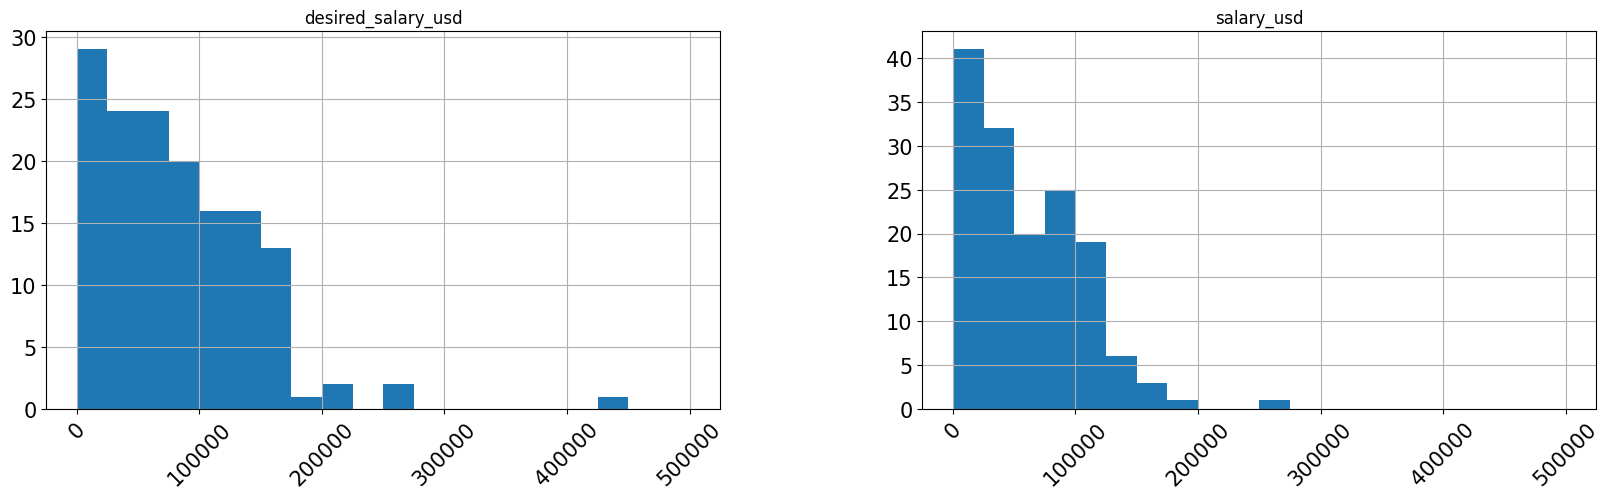

In [9]:
plot = responses_all.hist(column=['salary_usd','desired_salary_usd'], bins=[0, 25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000], figsize=(20,5), xrot=45, xlabelsize=15, ylabelsize=15)

### How much more Python developers would like to earn?

At a maximum 317%
On average 46%
At a minimum -7%


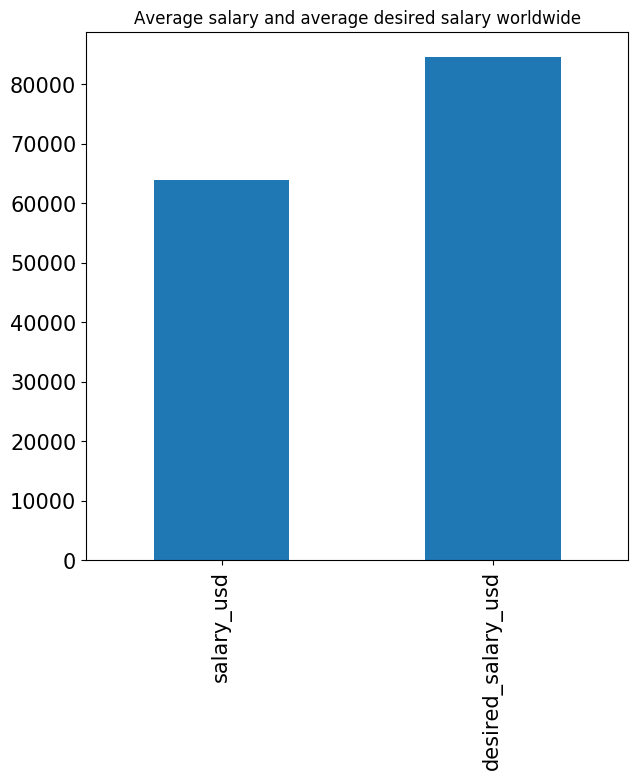

In [10]:
x = responses_all[['salary_usd','desired_salary_usd']].mean()
# x.plot(kind='barh')
plot = x.plot(kind="bar", figsize=(7,7), fontsize=15, title="Average salary and average desired salary worldwide")
print("At a maximum {0:.0%}".format(((responses_all['desired_salary_usd'] - responses_all['salary_usd'])/responses_all['salary_usd'] ).max()))
print("On average {0:.0%}".format(((responses_all['desired_salary_usd'] - responses_all['salary_usd'])/responses_all['salary_usd'] ).mean()))
print("At a minimum {0:.0%}".format(((responses_all['desired_salary_usd'] - responses_all['salary_usd'])/responses_all['salary_usd'] ).min()))

### Salary as a function of years of experience

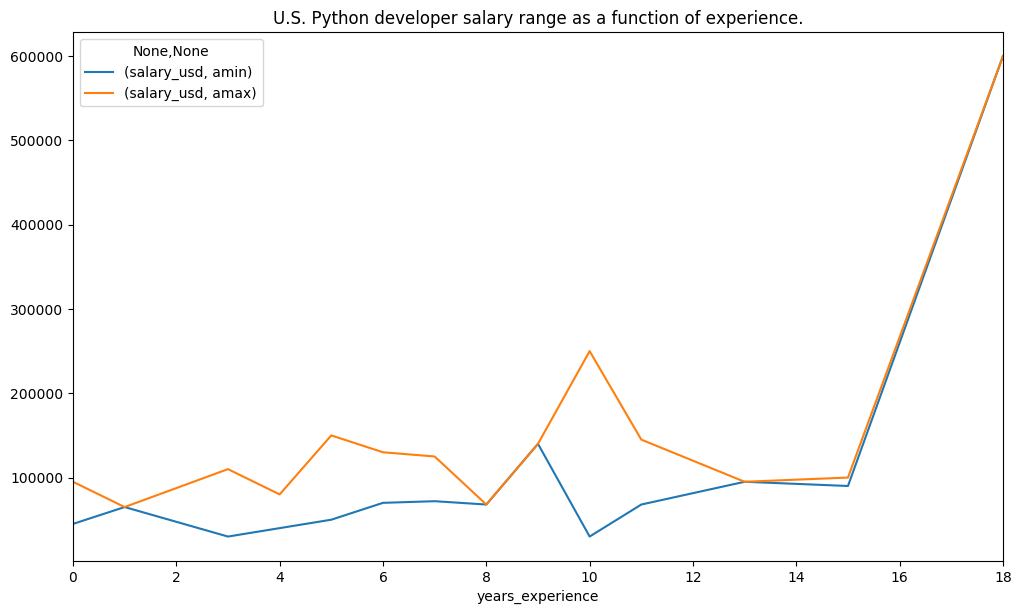

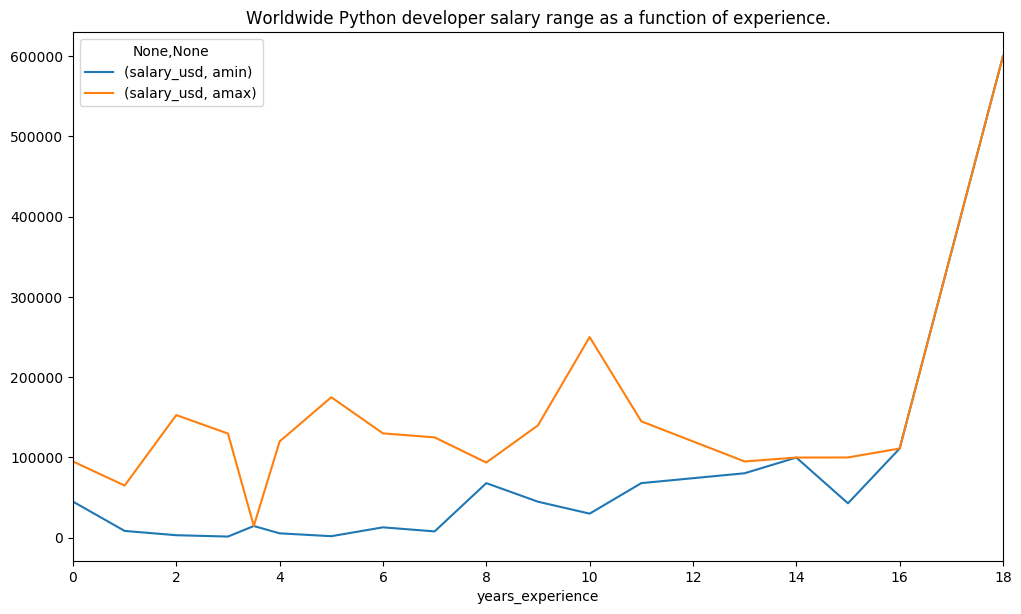

In [11]:
from numpy import max, min
df = responses_usa[['years_experience','salary_usd']]
g = df.groupby('years_experience')
df = g.agg([min, max])
df.plot(kind="line", figsize=(12,7), title="U.S. Python developer salary range as a function of experience.")

df = responses_all[['years_experience','salary_usd']]
g = df.groupby('years_experience')
df = g.agg([min, max])
df.plot(kind="line", figsize=(12,7), title="Worldwide Python developer salary range as a function of experience.")

## About Us
* Pystreet is a up and coming online community of professional Python developers. We are currently in pre-launch mode at http://pystreet.com

* SlashDB is a new kind of middleware, which instantly creates REST APIs to SQL databases so their content becomes instantly accessible to authorized web, mobile and enterpise applications and end-users, under standard data formats for reading and writing. http://www.slashdb.com/
* vt.enterprise is a technology consultancy, co-sourcing and software development firm located in Jersey City, NJ. We are hiring: http://vtenterprise.com/career.html

<div style="padding:20px 0;width:100%;text-align:center;">
    
    <span style="display:inline-block;margin:0 20px;vertical-align:middle;">
        <a href="http://pystreet.com/"><img src="https://pbs.twimg.com/profile_images/2205879609/pystreet-logo.png" width="80"/></a>
    </span>
    <span style="display:inline-block;margin:0 20px;vertical-align:middle;">
        <a href="http://www.vtenterprise.com/"><img src="http://vtenterprise.com/vtlogosmall.jpg" /></a>
    </span>
    <span style="display:inline-block;margin:0 20px;vertical-align:middle;">
        <a href="http://www.slashdb.com/"><img src="http://www.slashdb.com/wp-content/uploads/2013/10/Picture5.png" width="80" /></a>
    </span>
    
</div>
